# Dichtebasiertes Clustering mit OPTICS


![Optics Clustering](optics.png)

Implementieren Sie den Clustering-Algorithmus OPTICS als Jupyter-Notebook! Nutzen Sie das unten gegebene Grundgerüst und beachten Sie die folgenden Anforderungen:

- Kennzeichnen Sie im Code, welcher der Cluster das Rauschen modelliert.
- Der Algorithmus OPTICS liefert eine sortierte Liste der zu clusternden Objekte zusammen mit einigen Daten (aus dieser wird dann mit $\varepsilon'$ das eigentliche Clustering erstellt).
- Benutzen Sie die Euklidische Distanz.
- Nutzen Sie auch andere Datensätze zum Testen. Sie können zum Beispiel auch den iris-Datensatz mit Optics clustern. Überlegen Sie sich verschiedene (sinnvolle) Parameter für $\varepsilon$, $\varepsilon'$ und $\text{minPts}$. Beachten Sie dabei, dass die Ergebnisse nicht immer vollständig Übereinstimmen müssen. Warum?
- Sie müssen kein eigenes Sortierverfahren schreiben. Verwenden Sie stattdessen den Datentyp *SortedListWithKey*. Dafür müssen Sie das Paket *sortedcontainers* installieren, falls
es nicht bereits vorinstalliert ist. Die schon installieten Pakete lassen sich im Terminal (Linux) oder in der Anaconda-Prompt (Windows) durch den Befehl ``conda list`` anzeigen.
Für die Installation gibt es zwei Möglichkeiten.
    - In Anaconda unter Environments *Not installed* auswählen und den Paketnamen im Suchfeld eingeben. Dann den *apply*-Button und *ok* drücken.
    - In der console durch ```pip install sortedcontainers```. Hierbei müssen Sie darauf achten, dass pip sich auf die gleiche Python-Installation oder Virtual Environment bezieht, unter der auch ihr Jupyter-Notebook läuft.
    - Wenn sich im Jupyter-Notebook der Befehl ```import sortedcontainers``` ohne Fehler ausführen lässt, war die Installation erfolgreich.
- Das Ergebnis eines OPTICS-Durchlaufs mit den Parametern $\text{minPts}= 5, \varepsilon = 6.0, \varepsilon' = 6.0$ finden Sie auf dem Bild *optics.png*.
- Der Algorithmus OPTICS und die Berechnung eines Clusterings aus dessen Ergebnis werden ausführlich und mit Pseudocode im Artikel von Ankerst et al. vorgestellt. (Download unter: http://dx.doi.org/10.1145/304182.304187)
- Ihre Implementierung können Sie bis zum 12.12.2022, 23:59 Uhr in Moodle abgeben.
- Sie dürfen und sollen die externen Pakete Numpy und sortedcontainers verwenden. Außerdem benötigen Sie für die Testfunktionen matplotlib und pandas. Für die 6 ECTS Aufgabe benötigen Sie, wie Sie unten sehen, weiterhin die Pakete math und scipy. Benutzen Sie keine weiteren Drittbibliotheken!
Sollten Sie Fragen zu den Aufgaben haben, wenden Sie sich bitte per E-Mail an [Maximilian Stubbemann](mailto:stubbemann@cs.uni-kassel.de).

---
## Zusatzaufgabe für 6 ECTS:
#### Bearbeiten Sie diese Aufgabe nur, falls Sie am Praktikum für 6 ECTS-Punkte teilnehmen, jedoch nicht, falls Sie am Praktikum für 3 ECTS-Punkte teilnehmen.
Optics liefert eine Clusterordnung bezüglich der Parameter $\varepsilon$ und MinPts.
Die Qualität der Ergebnisse hängt also maßgeblich von diesen Parametern ab. In der Vorlesung und in dem Paper von Ankerst et al werden Möglichkeiten vorgestellt, wie diese anhand eines gegebenen Datensatzes sinnvoll gewählt werden können. Implementieren Sie die Klassenmethode ``from_heuristics``, welche ein Element der Klasse Optics erstellt und dabei die Parameter $\varepsilon$ und MinPts anhand des gegebenen Datensatzes selber wählen kann. Die Funktion soll zu einem gegebenem Datensatz ``examples`` die Parameter wie folgt bestimmen:
- Der Parameter MinPts KANN vorgeben werden. Ist er nicht vorgegeben (d.h. er hat den Defaultwert None), so soll er mit der Formel $Minpts = 2*d+2$ berechnet werden. Hierbei ist $d$ die Dimensionalität des Datensatzes.
- Der Parameter $\varepsilon$ soll mittels der Formel für $r$ in Kapitel 4 des Paper bestimmt werden. Hierbei benötigen sie $Volume_{DS}$, das Volumen des Datensatzes. Dies können sie wie folgt (sehr grob) approximieren. Hat ihr Datensatz $n$ Dimensionen, so berechnen sie für jedes $i \in \{1,..,n\}$ den Wert $x_i$ als Differenz von dem größten bezüglich dieser Koordinate vorkommenden Wertes minus dem kleinsten vorkommenden Wertes. Das Volumen kann dann mitels des Produktes $Volume_{DS} = \prod_{i=1}^n x_i$ berechnet werden. Beispiel: Der Datensatz $\{(1, 5, 3), (3, -1, -2), (7, 0, 0)\}$ hätte das Volumen $(7-1) * (5-(-1)) *(3-(-2))=6*6*5=180$.

**Hinweis:** Um zu verstehen wie Klassenmethoden in Python funktionieren, können Sie sich zum Beispiel (https://stackabuse.com/pythons-classmethod-and-staticmethod-explained/) anschauen.


Ein wichtiges Feature des Optics Algorithmus ist, dass er visuell interpretierebare Daten über die Clusterstruktur liefert.

- Veranschaulichen Sie die Reachability-Werte durch einen Plot analog zu den Plots im Paper. Schreiben Sie eine Funktion `run_and_plot2`, die, analog zu `run and plot`, DBSCAN ausführt und dann das Reachabilitydiagramm printet. Dabei soll ihre Implementierungen auch in der Lage sein, die Paramater $\varepsilon$ und MinPts mittels ``from_heuristics`` zu bestimmen, falls sie nicht übergeben werden.



# Implementierung

In [19]:
import numpy as np
from sortedcontainers import SortedListWithKey

# Just needed for 6ECTS. Delete for 3 ECTS!
from math import pi
from scipy.special import gamma

def euclidean_dist(x, y):
    a = np.array(x)
    b = np.array(y)
    return np.linalg.norm(a-b)

class Optics():
    def __init__(self, epsilon=6.0, min_pts=5, dist_fun=euclidean_dist):
        self.epsilon = epsilon
        self.min_pts = min_pts
        self.dist_fun = dist_fun
    
    def extract_clustering(self, cluster_order, epsilon_prime):
        assert(epsilon_prime <= self.epsilon)
        # TODO: cluster_ids
        clusters = []
        noise = 0
        clusterId = 1
        for element in cluster_order:
            if element.reachability_distance is None or element.reachability_distance > self.epsilon:
                if element.core_distance is not None and element.core_distance <= self.epsilon:
                    clusters.append(clusterId)
                    clusterId += 1
                else:
                    clusters.append(noise)
            else:
                clusters.append(clusterId)
        return clusters
    
    def optics(self, objects):
        results = []
        #speichern alle Elemente mit Rapper OpticsData um  mit Daten zu mulipulieren
        opticsDataObjects = []
        for element in objects:
            # für jede Objekt ein OpticsData zu schachten
            obj = OpticsData(element)
            opticsDataObjects.append(obj)
        for element in opticsDataObjects:
            if not element.processed:
                self.expand_cluster_order(opticsDataObjects,element,results)
        return results
    
    def expand_cluster_order(self, objects, obj, results):
        #jede obj eine List von Nachbarn geben, jede Element mit Typ OpticsData()
        neighbors = obj.getNeighbors(self.epsilon,objects)
        obj.processed = True
        obj.reachability_distance = None
        obj.set_core_distance(neighbors,self.min_pts)
        results.append(obj)
        orderSeeds = OrderSeeds()
        if obj.core_distance != None:
            orderSeeds.update(neighbors,obj)
            while not orderSeeds.is_empty():
                currentObj = orderSeeds.seeds.pop(0)
                neighbors = currentObj.getNeighbors(self.epsilon,objects)
                currentObj.processed = True
                currentObj.set_core_distance(neighbors,self.min_pts)
                results.append(currentObj)
                if currentObj.core_distance != None:
                    orderSeeds.update(neighbors,currentObj)
        pass
    
   
    @classmethod
    def from_heuristics(cls, examples, min_pts=None, dist_fun=euclidean_dist):
        # TODO for 6 ECTS
        # class with intial epsilon
        d = len(examples[0])
        n = len(examples)
        min_pts = 2 * d + 2 
        exampleN = np.array(examples)
        maxCordinate = np.max(exampleN, axis = 0)
        minCordinate = np.min(exampleN, axis = 0)
        volum = 1
        for x_i,y_i in zip(maxCordinate,minCordinate):
            volum *= abs(x_i - y_i)
        zaeler = volum * min_pts * gamma(d/2 + 1)
        nenner = n * np.power(pi**d,(1/2))
        zahl = zaeler / nenner
        epsilon = np.power(zahl,(1/d))
        return cls(epsilon,min_pts)

class OpticsData():
    """
    This class should be used to store the needed information of
    each individual example (i.e. datatpoint).
    """
    def __init__(self, example):
        self.example = example
        self.core_distance = None
        self.reachability_distance = None
        self.processed = False
            
    def __str__(self):
        # TODO: String, welcher die zum OpticsData-Objekt gehörenden Informationen in einem sinnvollen,
        # gut lesbaren Format ausgibt.
        return f'OpticsData({self.example},{self.core_distance},{self.reachability_distance})'
    
    def __repr__(self):
        return self.__str__()
    
    def set_core_distance(self,neighbors,min_pts,dist_fun=euclidean_dist):
        #neoghbours Größe größer als min_pts
        if len(neighbors) >= min_pts:
            #orden wir den List mit Abstand und nehmen wir den größte Wert 
            neighborsDistance =SortedListWithKey([])
            for element in neighbors:
                distance = dist_fun(element.example,self.example)
                neighborsDistance.add(distance)   
            self.core_distance = neighborsDistance[min_pts-1]
        return None
    
    def getNeighbors(self,epsilon,objects,dist_fun=euclidean_dist):
        neighbors = []
        for element in objects:
            distanceElementObj = dist_fun(element.example,self.example)
            if distanceElementObj <= epsilon:
                neighbors.append(element)
        return neighbors
        
class OrderSeeds():
    def __init__(self, dist_fun=euclidean_dist):
        self.dist_fun = dist_fun
        self.seeds = SortedListWithKey([], key=lambda obj: obj.reachability_distance)
    
    def is_empty(self):
        return len(self.seeds)==0
    
    def update(self, neighbors, center_object,dist_fun=euclidean_dist):
        # TODO
        coreDist = center_object.core_distance
        for element in neighbors:
            #wie kann man vermeiden element 2 mal zu berechnen
            if not element.processed:
                newReachabilityDistance = max(coreDist,dist_fun(element.example,center_object.example))
                if element.reachability_distance is None:
                    element.reachability_distance = newReachabilityDistance
                    self.seeds.add(element)
                elif element.reachability_distance > newReachabilityDistance:
                    element.reachability_distance = newReachabilityDistance
        pass

def run_and_plot2(examples, epsilon = None, min_pts = None):
    # TODO for 6 ECTS. DBSCAN hier ausführen
    if not epsilon:
        optics = Optics.from_heuristics(examples, min_pts)
    else:
        optics = Optics(epsilon=epsilon, min_pts=min_pts)
    #Anordnung für alle Objekt mit reachability distance
    cluster_order = optics.optics(examples) 
    
    plt.bar(len(cluster_order),optics.epsilon)
    pos = 0
    for element in cluster_order:
        height = element.reachability_distance
        if height is None:
            height = optics.epsilon
        plt.bar(pos,height, color = "pink")
        pos += 1
    plt.show()
    pass

# Ausführen des Clusterings
Hier kann der implementierte Algorithmus getestet werden. Bitte an den vorhandenen Zellen nichts ändern. Sie können aber weitere Zellen mit eigenem Code hinzufügen oder andere Parameterwerte ausprobieren (die Sie in der Abgabe dann wieder auf die ursprünglichen Werte ändern).

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
def run_and_plot(examples, epsilon=None, min_pts=None, epsilon_prime=1):
    
    # Run OPTICS and DBSCAN
    if not epsilon:
        optics = Optics.from_heuristics(examples, min_pts)
    else:
        optics = Optics(epsilon=epsilon, min_pts=min_pts)
    #Anordnung für alle Objekt mit reachability distance
    cluster_order = optics.optics(examples) 
    cluster_ids = optics.extract_clustering(cluster_order, epsilon_prime)
    
    # Plot the clusters
    unique_clusters = set(cluster_ids)
    plt.figure()
    for cluster_id in unique_clusters:
        examples_for_cluster = [cluster_order[i].example for i in range(len(cluster_ids)) if cluster_ids[i] == cluster_id]
        x, y = [ex[0] for ex in examples_for_cluster], [ex[1] for ex in examples_for_cluster]
        plt.scatter(x, y)
    plt.show()

In [22]:
data = pd.read_csv('punkte.csv', header=None)
data
examples = data.values.tolist()
epsilon=6.0
min_pts=5
optics = Optics(epsilon=epsilon, min_pts=min_pts)
cluster_order = optics.optics(examples) 
epsilon_prime=1
cluster_ids = optics.extract_clustering(cluster_order, epsilon_prime)
print(cluster_order)
print(cluster_ids)

[OpticsData([10, 41],None,None), OpticsData([10, 51],4.47213595499958,None), OpticsData([11, 55],None,4.47213595499958), OpticsData([14, 49],4.47213595499958,4.47213595499958), OpticsData([14, 51],4.0,4.47213595499958), OpticsData([9, 47],None,4.47213595499958), OpticsData([15, 46],5.0990195135927845,4.47213595499958), OpticsData([18, 48],4.123105625617661,4.47213595499958), OpticsData([22, 49],6.0,4.123105625617661), OpticsData([18, 51],4.47213595499958,4.0), OpticsData([11, 45],5.0,5.0), OpticsData([14, 55],5.656854249492381,4.0), OpticsData([18, 55],5.656854249492381,4.47213595499958), OpticsData([22, 43],None,6.0), OpticsData([22, 54],None,5.0), OpticsData([10, 8],4.242640687119285,None), OpticsData([14, 8],None,4.242640687119285), OpticsData([6, 7],4.123105625617661,4.242640687119285), OpticsData([2, 8],5.830951894845301,4.123105625617661), OpticsData([4, 4],None,4.123105625617661), OpticsData([7, 11],5.0,4.123105625617661), OpticsData([9, 4],None,4.242640687119285), OpticsData([1

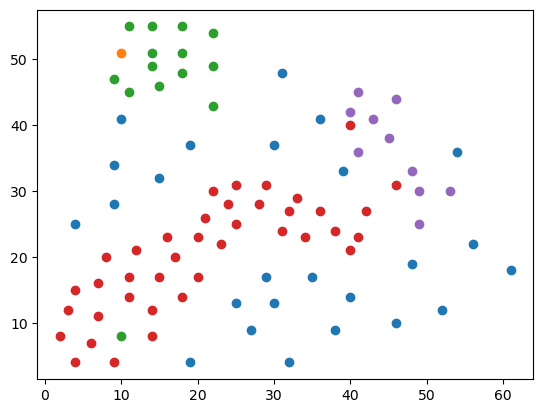

In [23]:
data = pd.read_csv('punkte.csv', header=None)
examples = data.values.tolist()
run_and_plot(examples, epsilon=6.0, min_pts=5, epsilon_prime=6.0)

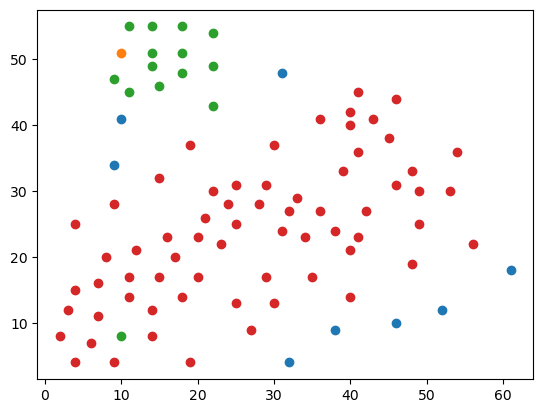

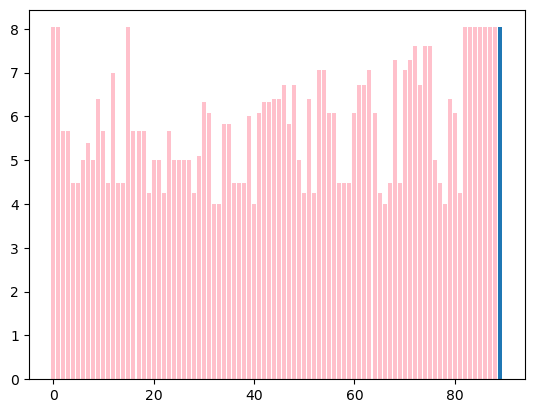

In [24]:
# Delete this cell if you just need 3 ECTS!
run_and_plot(examples, epsilon_prime=6.0)
run_and_plot2(examples, min_pts=5)

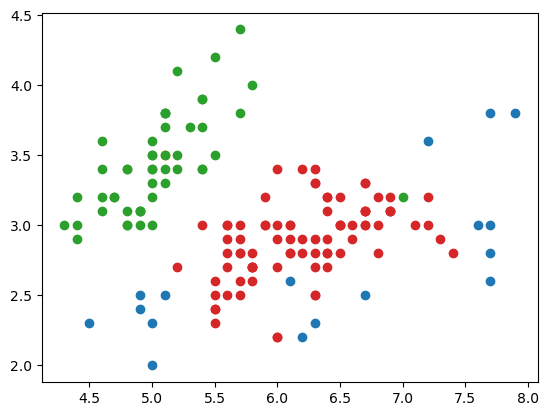

In [25]:
data = pd.read_csv('iris.csv')
del data['species']
examples = data.values.tolist()
run_and_plot(examples, epsilon=0.5, epsilon_prime=0.5, min_pts=5)

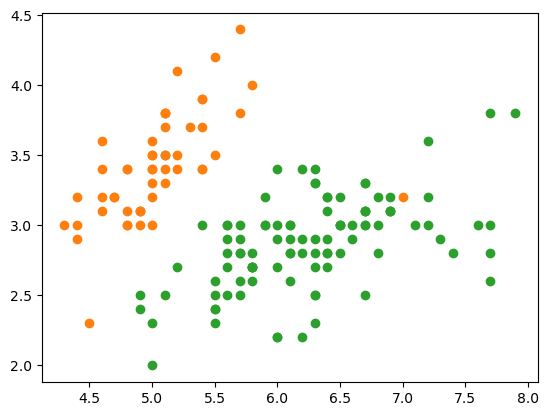

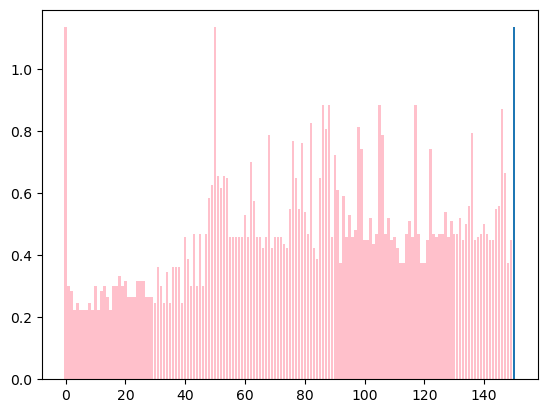

In [26]:
# Delete this cell if you just need 3 ECTS!
run_and_plot(examples, min_pts=5, epsilon_prime=0.5)
run_and_plot2(examples)

In [18]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))